In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas import get_dummies

In [2]:
# View the dataset

vg_data = pd.read_csv('../Resources/vg_sales.csv')
vg_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [3]:
# View the shape of the dataset

print(vg_data.shape)

(16719, 16)


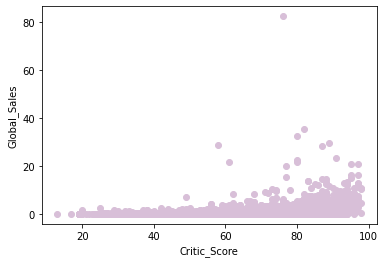

In [4]:
# Check for outliers

x = vg_data['Critic_Score']
y = vg_data['Global_Sales']

plt.scatter(x, y, color = 'thistle')
plt.ylabel('Global_Sales')
plt.xlabel('Critic_Score')
plt.show()

In [5]:
# Remove single outlier

vg_data = vg_data.drop(vg_data[(vg_data['Critic_Score']>60) & (vg_data['Global_Sales']>60)].index)

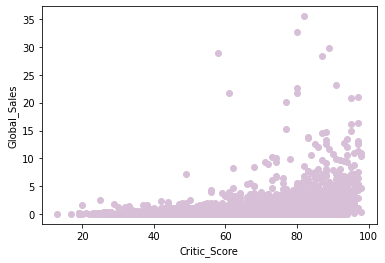

In [6]:
# Confirm outlier has been removed

x = vg_data['Critic_Score']
y = vg_data['Global_Sales']

plt.scatter(x, y, color = 'thistle')
plt.ylabel('Global_Sales')
plt.xlabel('Critic_Score')
plt.show()

In [7]:
# Check for any N/A values

null_vg_data = (vg_data.isnull().sum() / len(vg_data)) * 100
null_vg_data = null_vg_data.sort_values(ascending=False)
missing_data = pd.DataFrame({'Ratio of Missing Data': null_vg_data})
missing_data.head(16)

,Ratio of Missing Data
User_Count,54.605814
Critic_Count,51.333892
Critic_Score,51.333892
Rating,40.489293
User_Score,40.100490
Developer,39.615983
Year_of_Release,1.609044
Publisher,0.323005
Genre,0.011963
Name,0.011963


In [8]:
# View the different types of platforms in the data

print(pd.value_counts(vg_data['Platform']))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


In [10]:
# Reduce the data to only prominent consoles subset

vg_data = vg_data[(vg_data['Platform'] == 'PS3') | (vg_data['Platform'] == 'PS4') | (vg_data['Platform'] == 'X360') | (vg_data['Platform'] == 'XOne') | (vg_data['Platform'] == 'Wii') | (vg_data['Platform'] == 'PC')]

print(pd.value_counts(vg_data['Platform']))

PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
Name: Platform, dtype: int64


In [11]:
# Check shape of data

print(vg_data.shape)

(5526, 16)


In [12]:
# Check N/A ratios again

null_vg_data = (vg_data.isnull().sum() / len(vg_data)) * 100
null_vg_data = null_vg_data.sort_values(ascending=False)
missing_data = pd.DataFrame({'Ratio of Missing Data': null_vg_data})
missing_data.head(16)

,Ratio of Missing Data
Critic_Count,37.459283
Critic_Score,37.459283
User_Count,34.654361
Rating,23.633731
User_Score,22.403185
Developer,21.552660
Year_of_Release,1.918205
Publisher,0.235252
Global_Sales,0.000000
Other_Sales,0.000000


In [13]:
# Further reduce data so that the ratio of N/A values is decreased

vg_data = vg_data.dropna(subset=['Critic_Score'])

In [14]:
# Check the shape of the data again

print(vg_data.shape)

(3456, 16)


In [15]:
# Check N/A ratios again

null_vg_data = (vg_data.isnull().sum() / len(vg_data)) * 100
null_vg_data = null_vg_data.sort_values(ascending=False)
missing_data = pd.DataFrame({'Ratio of Missing Data': null_vg_data})
missing_data.head(16)

,Ratio of Missing Data
User_Count,5.121528
Rating,2.054398
Year_of_Release,2.054398
User_Score,0.578704
Developer,0.086806
Publisher,0.086806
Critic_Count,0.000000
Critic_Score,0.000000
Global_Sales,0.000000
Other_Sales,0.000000


In [16]:
# Replace leftover N/A values with median and mode values

vg_data['Publisher'] = vg_data['Publisher'].fillna(vg_data['Publisher'].mode()[0])

vg_data['Developer'] = vg_data['Developer'].fillna(vg_data['Developer'].mode()[0])

vg_data['Rating'] = vg_data['Rating'].fillna(vg_data['Rating'].mode()[0])

vg_data['Year_of_Release'] = vg_data['Year_of_Release'].fillna(vg_data['Year_of_Release'].median())

vg_data['User_Count'] = vg_data['User_Count'].fillna(vg_data['User_Count'].median())

In [17]:
# Replace "tbd" values in Critic_Score with N/A values then replace N/A values with median

vg_data['User_Score'] = vg_data['User_Score'].replace('tbd', None)


vg_data['User_Score'] = vg_data['User_Score'].fillna(vg_data['User_Score'].median())

In [18]:
# Check N/A ratios again

null_vg_data = (vg_data.isnull().sum() / len(vg_data)) * 100
null_vg_data = null_vg_data.sort_values(ascending=False)
missing_data = pd.DataFrame({'Ratio of Missing Data': null_vg_data})
missing_data.head(16)

,Ratio of Missing Data
Rating,0.0
Developer,0.0
User_Count,0.0
User_Score,0.0
Critic_Count,0.0
Critic_Score,0.0
Global_Sales,0.0
Other_Sales,0.0
JP_Sales,0.0
EU_Sales,0.0


In [19]:
# View data 

vg_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
5,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
6,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
8,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E


In [20]:
# Drop unecessary columns

vg_data = vg_data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [21]:
# View data with only necessary columns

vg_data.head()

,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
5,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E
6,Wii,2009.0,Platform,28.32,87.0,80.0,8.4,594.0,E
8,Wii,2007.0,Sports,22.70,80.0,63.0,7.7,146.0,E


In [22]:
# Convert categorical values to numerical values

vg_data = pd.get_dummies(data = vg_data, columns=['Platform', 'Genre', 'Rating'])

vg_data.head()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T
2,2008.0,35.52,82.0,73.0,8.3,709.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2009.0,32.77,80.0,73.0,8,192.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
5,2006.0,28.92,58.0,41.0,6.6,129.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,2009.0,28.32,87.0,80.0,8.4,594.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,2007.0,22.70,80.0,63.0,7.7,146.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [23]:
def hit(sales):

    if sales >= 10:
        return 1
    else:
        return 0

vg_data['Global_Sales'] = vg_data['Global_Sales'].apply(lambda x: hit(x))

vg_data.head(1000)

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T
2,2008.0,1,82.0,73.0,8.3,709.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2009.0,1,80.0,73.0,8,192.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
5,2006.0,1,58.0,41.0,6.6,129.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,2009.0,1,87.0,80.0,8.4,594.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,2007.0,1,80.0,63.0,7.7,146.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,2009.0,0,61.0,23.0,7.1,36.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4438,2013.0,0,79.0,7.0,5.2,45.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4441,2014.0,0,72.0,8.0,5.8,32.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4448,2013.0,0,77.0,6.0,7.1,25.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Define X and Y for training and testing data

X = vg_data[['Year_of_Release', 'Critic_Score', 'Critic_Count','User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
    'Platform_PS4', 'Platform_Wii', 'Platform_X360',
    'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
    'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
    'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
    'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
    'Rating_RP', 'Rating_T']]

Y = vg_data[['Global_Sales']]

In [26]:
# Check length of both X and Y match

print(X.shape)
print(Y.shape)

(3456, 28)
(3456, 1)


In [27]:
# Split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [28]:
# Check length of both train and test data match

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))


X_train shape: (2592, 28)
Y_train shape: (2592, 1)
X_test shape: (864, 28)
Y_test shape: (864, 1)


**LOGISTIC REGRESSION MODEL CLASSIFIER**

In [29]:
# Train the Logistic Regression model on the unscaled data and print the model score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [38]:
classifier.fit(X_train, np.ravel(Y_train))
print(f"Training Score: {classifier.score(X_train, np.ravel(Y_train))}")
print(f"Testing Score: {classifier.score(X_test, np.ravel(Y_test))}")

Training Score: 0.9930555555555556
Testing Score: 0.9907407407407407


C:\Users\cpres\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [32]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Train the Logistic Regression model on the scaled data and print the model score

classifier.fit(X_train_scaled, np.ravel(Y_train))

LogisticRegression()

In [35]:
print(f"Training Score: {classifier.score(X_train_scaled, Y_train)}")
print(f"Testing Score: {classifier.score(X_test_scaled, Y_test)}")

Training Score: 0.9930555555555556
Testing Score: 0.9918981481481481


**RANDOM FOREST CLASSIFIER MODEL**

In [39]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, np.ravel(Y_train))

In [40]:
print(f'Training Score: {rfclassifier.score(X_train, Y_train)}')
print(f'Testing Score: {rfclassifier.score(X_test, Y_test)}')

Training Score: 1.0
Testing Score: 0.9942129629629629


In [41]:
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [42]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Train a Random Forest Classifier model on the scaled data and print the model score

rfclassifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, np.ravel(Y_train))

In [47]:
print(f'Training Score: {rfclassifier.score(X_train_scaled, np.ravel(Y_train))}')
print(f'Testing Score: {rfclassifier.score(X_test_scaled, np.ravel(Y_test))}')

Training Score: 1.0
Testing Score: 0.9942129629629629
